In [10]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clean_Dataset.csv')

In [19]:
print(data)

        Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [21]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [22]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [23]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [24]:
#resultado
print(data)

        Unnamed: 0  airline  flight  source_city  departure_time  stops  \
0                0        4    1408            2               2      2   
1                1        4    1387            2               1      2   
2                2        0    1213            2               1      2   
3                3        5    1559            2               4      2   
4                4        5    1549            2               4      2   
...            ...      ...     ...          ...             ...    ...   
300148      300148        5    1477            1               4      0   
300149      300149        5    1481            1               0      0   
300150      300150        5    1486            1               1      0   
300151      300151        5    1483            1               1      0   
300152      300152        5    1477            1               4      0   

        arrival_time  destination_city  class  duration  days_left  price  
0                  5   

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  int64  
 2   flight            300153 non-null  int64  
 3   source_city       300153 non-null  int64  
 4   departure_time    300153 non-null  int64  
 5   stops             300153 non-null  int64  
 6   arrival_time      300153 non-null  int64  
 7   destination_city  300153 non-null  int64  
 8   class             300153 non-null  int64  
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 27.5 MB


In [29]:
# Lectura de Datos
X = data.iloc[:, :12]
y = data.iloc[:, 8]
m = y.size

In [30]:
print(X)
print('*'*25)
print(y)

        Unnamed: 0  airline  flight  source_city  departure_time  stops  \
0                0        4    1408            2               2      2   
1                1        4    1387            2               1      2   
2                2        0    1213            2               1      2   
3                3        5    1559            2               4      2   
4                4        5    1549            2               4      2   
...            ...      ...     ...          ...             ...    ...   
300148      300148        5    1477            1               4      0   
300149      300149        5    1481            1               0      0   
300150      300150        5    1486            1               1      0   
300151      300151        5    1483            1               1      0   
300152      300152        5    1477            1               4      0   

        arrival_time  destination_city  class  duration  days_left  price  
0                  5   

In [31]:
fila_deseada = 2
if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print (fila_completa)
else:
    print ("la fila no existe")


[2.000e+00 0.000e+00 1.213e+03 2.000e+00 1.000e+00 2.000e+00 1.000e+00
 5.000e+00 1.000e+00 2.170e+00 1.000e+00 5.956e+03]


In [32]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Normaliza entre -0.5 y 0.5 (revisar) porque se dan valores negativos y postivos

In [33]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

        Unnamed: 0  airline  flight  source_city  departure_time  stops  \
0                0        4    1408            2               2      2   
1                1        4    1387            2               1      2   
2                2        0    1213            2               1      2   
3                3        5    1559            2               4      2   
4                4        5    1549            2               4      2   
...            ...      ...     ...          ...             ...    ...   
300148      300148        5    1477            1               4      0   
300149      300149        5    1481            1               0      0   
300150      300150        5    1486            1               1      0   
300151      300151        5    1483            1               1      0   
300152      300152        5    1477            1               4      0   

        arrival_time  destination_city  class  duration  days_left  price  
0                  5   

In [34]:
def sigmoid(z):
  #calcula la sigmoide de una entrada z, convierte la entrada a una entrada numpy
  z = np.array(z)
  g = np.zeros(z.shape)
  g = 1/(1+np.exp(-z))
  return g


In [35]:
#prueba para sigmoid
z = 0
g = sigmoid(z)
print ('g(',z,') = ', g)

g( 0 ) =  0.5


In [36]:
# Añade el termino de interseccion a X
m,n = X.shape
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [37]:
print(X)

[[ 1.         -1.73204504  0.48827006 ... -1.39753079 -1.84387477
  -0.65806849]
 [ 1.         -1.7320335   0.48827006 ... -1.3752838  -1.84387477
  -0.65806849]
 [ 1.         -1.73202195 -1.69363332 ... -1.39753079 -1.84387477
  -0.65793631]
 ...
 [ 1.          1.73202195  1.0337459  ...  0.22371837  1.69569214
   2.56454459]
 [ 1.          1.7320335   1.0337459  ... -0.30881888  1.69569214
   2.67407096]
 [ 1.          1.73204504  1.0337459  ... -0.29769538  1.69569214
   2.67407096]]


In [38]:
def calcularcosto(theta, X, y,):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot (theta.T))
    J = (1/m) * np.sum(-y.dot(np.log(h))-(1-y).dot(np.log(1-h)))

    return J


In [39]:
def descensoGradiente(theta , X, y, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha/m)*(h - y).dot(X)

        J_history.append(calcularcosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 1.40499302e+00 -1.10030548e+00  1.55898591e-02 -1.48641016e-01
 -9.12130784e-02  8.64253155e-03 -8.14328290e-02  1.17273518e-03
  1.68369266e-03  2.06242852e+00  2.72381438e-02 -7.03834380e-02
 -1.72228531e+00]
El valor predecido es (usando el descenso por el gradiente): 0.9907


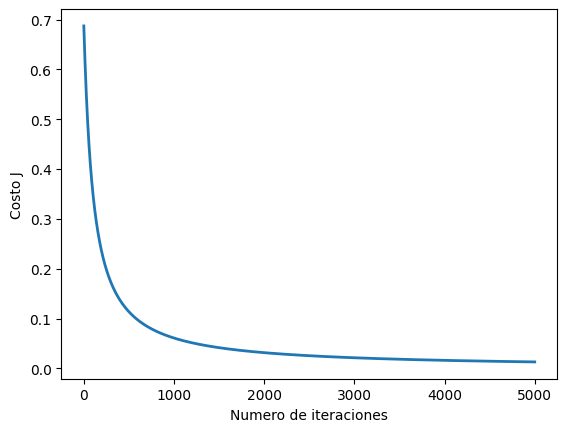

In [54]:
# Elegir algun valor para alpha (probar varias alternativas)
# si es grande se resta más a los thetas, si es menor alfa va cambiando poco a poco
#se necesitan muchas iteraciones, si es grande el alfa salta mucho y no llega facilmente
# mejores alfas = 0.1, 0.01, 0.001, 0.0001, 0.0005
alpha = 0.01
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(13)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el tipo de vuelo
X_array = [1, -1.232045, 0.688270, 0.649163, -0.229721, -0.337897, 2.877006, 1.405790, 1.182425, 0.572576, -1.797531, -1.643875, -0.558068]
clase= sigmoid(np.dot(theta, X_array))   # Change the order of arguments

print('El tipo de vuelo predecido es (usando el descenso por el gradiente): {:.4f}'.format(clase))